# Lab 01: Dealing with Spatial Data in Python
In this tutorial, we will work on dealing with non-spatial and spatial data using Python libraries: pandas and geopandas. Many concepts/techniques will be echoed to the ones you have learned from [](lecture02) and [](lecture03). 

To follow this tutorial, you should have installed [Jupyter Notebook](https://jupyter.org/install) (or Jupyter Lab) on your own computer (note: computers in the lab should have already installed it).  

Requred packages include:
- [pandas](https://pandas.pydata.org/docs/getting_started/install.html) / [geopandas](https://geopandas.org/en/stable/getting_started/install.html)
- [shapely](https://pypi.org/project/Shapely/)
- [pysal](https://pysal.org/docs/install/)
- [pyproj](https://pypi.org/project/pyproj/)
- [osmnx](https://osmnx.readthedocs.io/en/stable/) / [pyrosm](https://pyrosm.readthedocs.io/en/latest/installation.html)
- [matplotlib](https://pypi.org/project/matplotlib/) (visualization)

Mostly, you can use the commond like `pip install pandas` to install the package. 

## Part 1: Basics in Pandas (for non-spatial data)
Pandas is currently the one of the most important tools for data scientists working in Python. It is the backbone of many state-of-the-art techniques like machine learning and visualization. Here we cover the basics of using Pandas. For more comprehensive tutorial, follow [this video](https://www.youtube.com/watch?v=5rNu16O3YNE) and/or [this post](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

First of all, the two key components in Pandas are `Series` and `DataFrame`. A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of `Series`. These two components are quite similar in the sense that many operations work on both, such as filling in null values and calculating the mean.

![Series and DataFrame](lab1-fig1.png)

### Create a dataframe from scratch 
There are many ways to create a `DataFrame` from scratch, but a great option is to just use a simple `dict` (this is a common data structure called dictionary, which is composed by a `key:value` pair). Each `key:value` pair corresponds to a column in the resulting `DataFrame`.

Let's say we have a fruit stand that sells apples and oranges. We want to have a column for each fruit and a row for each customer purchase. To organize this as a dictionary in `pandas`, we could do something like:

In [1]:
import pandas as pd
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
purchases = pd.DataFrame(data)
purchases

/var/folders/xg/5n3zc4sn5hlcg8zzz6ysx21m0000gq/T/ipykernel_29404/2875102215.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2

The index of this `DataFrame` was given to us by default as the numbers 0-3. We could also create our own when we initialize the DataFrame.

In [2]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

With the new index, now we could locate a customer's order by using their name more intuitively:

In [3]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

### Loading data 
We can also load in data with formats like `csv`, `json`, `txt`, and so on. For example, if you downloaded `purchase.csv` to your local directory, you should be able to load the data by running:

In [4]:
purchases_loaded = pd.read_csv('purchase.csv')
purchases_loaded

Unnamed:0  apples  oranges
0      June       3        0
1   Robert        2        3
2      Lily       0        7
3     David       1        2

Note here that CSVs don't have indexes like `DataFrames`, so we need to designate the `index_col` when reading:

In [5]:
purchases_loaded = pd.read_csv('purchase.csv', index_col=0)
purchases_loaded

apples  oranges
Unnamed:0                 
June            3        0
Robert          2        3
Lily            0        7
David           1        2

### Viewing your data
There are many operations to view/describe your data. For example, you can use `.head()` to check the first several rows of your `Dataframe`, `.tail()` to see the last severl rows, `.info()` to have a list of information about your `Dataframe` (you are encouraged to always run it first after your data is loaded), `.shape` to see the dimension of your `Dataframe` (i.e. how many rows and columns are there?), etc. Let's try `.info()` here and you could also try the others yourself. 

In [6]:
purchases_loaded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, June to David
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   apples   4 non-null      int64
 1   oranges  4 non-null      int64
dtypes: int64(2)
memory usage: 96.0+ bytes


From the output, you can see our loaded `purchases_loaded` dataframe has 4 entries (rows), and there are two columnes, each has 4 non-null values and their data types are both int64 (i.e. integer with 64 digits). Data type (`Dtype`) here is an important concept (we have covered it in our lecture too). Different data types might imply various operations/analysis that are available. See the table below for a full list of data types in Pandas, and Python and NumPy (another important package in Python).  

![dtype_pandas](lab1-fig2.png)

### Querying (selecting, slicing, extracting) Dataframe
Similar to the complex DBMS, `Pandas` also supports selecting, slicing or extracting data from the `Dataframe`. 
#### Select by column 
We can extract a column using square brackets like this:

In [7]:
purchases_apple = purchases_loaded['apples'] #how many apples each person bought? 
purchases_apple

Unnamed:0
June       3
Robert     2
Lily       0
David      1
Name: apples, dtype: int64

In [8]:
type(purchases_apple)

pandas.core.series.Series

Notice that the returned `purchases_apple` is a `Series`. To extract a column as a `DataFrame`, we need to pass a list of column names. In our case that's just a single column of "apples", but is within a double bracket (so that it is a list):

In [9]:
purchases_apple = purchases_loaded[['apples']]
type(purchases_apple)

pandas.core.frame.DataFrame

#### Select by row 
For rows, we can use two ways to extract data:
- `loc`: locates by name
- `iloc`: locates by numerical index

For example, we can select the row of June (how many apples and oranges June has got?) from our `purchase_loaded` dataframe. 

In [10]:
purchases_June = purchases_loaded.loc["June"] # How many fruits June has bought? 
purchases_June

apples     3
oranges    0
Name: June, dtype: int64

#### Conditional selection 
So far, We’ve gone through retrieving/quring data by columns and rows, but what if we want to make a conditional selection?

For example, what if we want to query our `purchases_loaded` dataFrame to show only people who bought apples less than 2?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [11]:
condition = (purchases_loaded['apples'] < 2)
condition

Unnamed:0
June       False
Robert     False
Lily        True
David       True
Name: apples, dtype: bool

A little bit more complex, how about showing people who bought apples less than 2 but oranges larger than 2? Can you try it? Hint, you need to use the logic operator `&` to connect two conditions. 

## Part 2: GeoPandas for Spatial Data
`Geopandas` is designed to process spatial data in Python. `Geopandas` combines the capabilities of data processing library `pandas` with other packages like `shapely` and `fiona` for managing and visualizing spatial data. The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrame` from `pandas`, but with spatial speciality.

The key difference between `GeoDataFrame` and `DataFrame` is that a `GeoDataFrame` contains at least one column as geometry so that the data entry is spatially referenced. By default, the name of this column is `'geometry'`. The geometry column is a `GeoSeries` which contains the geometries (points, lines, polygons, multipolygons etc.) as `shapely` objects.

### Loading spatial data 
Spatial data that are in the format of `geojson`, `shp`, etc. can all be loaded as GeoPandas' Dataframe (`GeoDataFrame`) by using the function `read_file()`. Let's use a shapefile (`shp`) downloaded from [OpenStreetMap](http://download.geofabrik.de/) as an example here. You can also find the specific data (building in Bristol) from Blackboard.  

In [12]:
import geopandas as gpd

# Filepath
bristol_building_file = "./bristol-buildings.shp/gis_osm_buildings_a_free_1.shp" # make sure the directory is correct in your case

# Read the file
bristol_building = gpd.read_file(bristol_building_file)

# How does it look?
bristol_building.head()

osm_id  code    fclass                          name        type  \
0  4309554  1500  building             Bristol City Hall        None   
1  4315318  1500  building             Clifton Cathedral      church   
2  4315809  1500  building  Clifton Down Shopping Centre      retail   
3  4317900  1500  building                  Za Za Bazaar        None   
4  4317901  1500  building           Mackenzies Café Bar  commercial   

                                            geometry  
0  POLYGON ((-2.60242 51.45242, -2.60241 51.45244...  
1  POLYGON ((-2.61673 51.45965, -2.61673 51.45965...  
2  POLYGON ((-2.61133 51.46431, -2.61070 51.46441...  
3  POLYGON ((-2.59869 51.45029, -2.59865 51.45042...  
4  POLYGON ((-2.59851 51.45107, -2.59850 51.45110...

As can be seen here, the `GeoDataFrame` named as `bristol_building` contains various attributes in separate columns. The `geometry` column contains its spatial information (it is [WKT format](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry), which is implemented by the `shapely` library). We can next take a look of the basic information of `bristol_building` using the following command: 

In [13]:
bristol_building.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 149805 entries, 0 to 149804
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   osm_id    149805 non-null  object  
 1   code      149805 non-null  int64   
 2   fclass    149805 non-null  object  
 3   name      7587 non-null    object  
 4   type      98915 non-null   object  
 5   geometry  149805 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 6.9+ MB


What kind of information can you get from this output?

Since our data is intrinsically spatial (it has a `geometry` column), we can visualize it to better understand its spatial distribution. `plot()` is the function for it:

<Axes: >

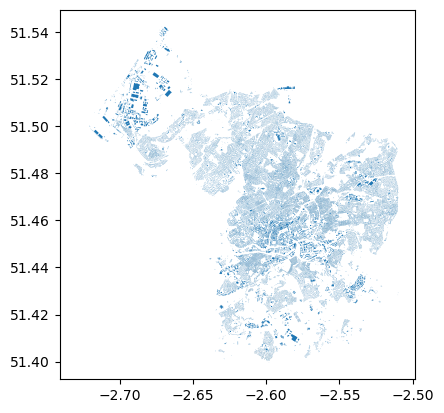

In [14]:
bristol_building.plot()

### Saving spatial data
Once you are done with your process/analysis, you can also save your `GeoDataFrame` into files (e.g., `.shp`, `.geojson`, etc). Here, since we loaded data from `.shp`, let's now try to save our data to `.geojson` (in the example below, we only save a subset of `bristol_building`):

In [15]:
bristol_building.iloc[:100].to_file('osm_bristol_buildings.geojson', driver='GeoJSON') 
## this will save your data to the current directory same to this notebook. 
## you can check the current directory by ruing cwd = os.getcwd()

### Retrieving data directly from OSM
We have so far seen how to read spatial data from your computer disk (i.e. the data is downloaded and saved on your local directory). Next, let’s see how we can retrieve data from OSM directly using a library called `pyrosm`. With `pyrosm`, you can easily retrieve data from anywhere in the world based on `OSM.PBF` files (a specific data format for OSM) that are distributed by [Geofabrik](http://download.geofabrik.de/). In fact, this is where the Bristol buildings data were downloaded. The package aims to be a more efficient way to parse OSM data covering large geographical areas (such as countries and cities). Many open data sets have this kind of packages in Python. So if your project needs to retrieve data from some of these kinds of open data platform, try to search if there are already some packages/API for you to easily do it.  

Note that if you would like to be flexible about your download, e.g., selecting a bounding box by yourself rather than by administrative regions, you can consider using [`OSMnx`](https://osmnx.readthedocs.io/en/stable/) library. 

In [16]:
from pyrosm import OSM, get_data

# Download data for Bristol
bristol = get_data("bristol")

# Initialize the reader object for Bristol
osm = OSM(bristol)

In the first command, we downloaded the data for “Bristol” using the `get_data` function. This function in fact automates the data downloading process and stores the data locally in a temporary folder. The next step was to initialize a reader object called `osm`. The `OSM()` function takes the filepath of a given `osm.pbf` file as an input. Notice that at this point we actually haven't yet read any data into a `GeoDataFrame`.

OSM contains a lot of information about the world, which is contributed by citizens like you and me. In principle, we can retrieve information under various themes from OSM using the following functions. 

- road networks –> `osm.get_network()`

- buildings –> `osm.get_buildings()`

- Points of Interest (POI) –> `osm.get_pois()`

- landuse –> `osm.get_landuse()`

- natural elements –> `osm.get_natural()`

- boundaries –> `osm.get_boundaries()`

Try them yourselves! You might consider using them in your dissertation project too. Here, let's extract the road network at Bristol from OSM:

In [17]:
bristol_roadnetwork = osm.get_network()

/Users/gy22808/opt/anaconda3/envs/ox/lib/python3.12/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


We can get the lenth of this DataFrame (how many road network do we have in Bristol from OSM?) and some basic descritions of it by running:

In [18]:
len(bristol_roadnetwork) 

105987

In [19]:
bristol_roadnetwork.describe() # note that it only provides a statistical summary for columns whoes data type is numeric

id  timestamp   version         length
count  1.059870e+05   105987.0  105987.0  105987.000000
mean   4.875556e+08        0.0       0.0     106.157793
std    4.085244e+08        0.0       0.0     190.256212
min    1.900000e+02        0.0       0.0       0.000000
25%    9.730754e+07        0.0       0.0      20.000000
50%    4.116708e+08        0.0       0.0      47.000000
75%    8.374229e+08        0.0       0.0     109.000000
max    1.352383e+09        0.0       0.0    7572.000000

Likewise, we can also plot it. Please try it yourself. 

### Coordinate Reference System for GeoDataFrame
Another difference between `GeoDataFrames` and `DataFrames` is that the former has intrinsic coordinate reference system (CRS) as it has the `geometry` column. To check this information, we can call its attribute `crs`:

In [20]:
bristol_roadnetwork.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

It shows that coordinates in `geometry` column are using the `WGS 84` with a EPSG code 4326. In fact, it is the mostly used coordinate reference system (CRS) in spatial data science as it is a global coordinate system and has been used for GPS as well. However, as we covered in the lecture, those global CRSs are not that accurate for local regions. For the UK, or Bristol, a more commonly used CRS is EPSG:27700 (National Grid for Great Britain), and this CRS is also projected. Let's then transfer `bristol_roadnetwork` from EPSG:4326 to EPSG:27700:

In [21]:
bristol_roadnetwork_reprojected = bristol_roadnetwork.to_crs(epsg=27700)
bristol_roadnetwork_reprojected.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

Instead of showing all the CRS related info, you could also query specific attributes of the CRS. For instance, the code below shows you what kind of ellipsoid the `bristol_roadnetwork_reprojected` dataframe is built on. There are dozens of other kinds of attributes. See the documentation [here](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html). 

In [25]:
bristol_roadnetwork_reprojected.crs.ellipsoid

ELLIPSOID["Airy 1830",6377563.396,299.3249646,
    LENGTHUNIT["metre",1],
    ID["EPSG",7001]]

Now we have a projected CRS for the road network data in Bristol. To confirm the difference, let’s take a look at the geometry of the first row in our original road network `bristol_roadnetwork` and the projected `bristol_roadnetwork_reprojected`.

In [22]:
orig_geom = bristol_roadnetwork.loc[0, "geometry"]
projected_geom = bristol_roadnetwork_reprojected.loc[0, "geometry"]

print("Orig:\n", orig_geom, "\n")
print("Proj:\n", projected_geom)

Orig:
 MULTILINESTRING ((-2.6097211837768555 51.3657112121582, -2.609546422958374 51.36564636230469), (-2.609546422958374 51.36564636230469, -2.609264612197876 51.365482330322266), (-2.609264612197876 51.365482330322266, -2.6088733673095703 51.365318298339844), (-2.6088733673095703 51.365318298339844, -2.608508825302124 51.36508560180664), (-2.608508825302124 51.36508560180664, -2.6083426475524902 51.3649787902832), (-2.6083426475524902 51.3649787902832, -2.608126163482666 51.364810943603516), (-2.608126163482666 51.364810943603516, -2.607820749282837 51.36458206176758)) 

Proj:
 MULTILINESTRING ((357648.974429959 163137.70370458602, 357661.0804417359 163130.39013390895), (357661.0804417359 163130.39013390895, 357680.5471925497 163111.98427999223), (357680.5471925497 163111.98427999223, 357707.6323758529 163093.51498389826), (357707.6323758529 163093.51498389826, 357732.79552590376 163067.42507962266), (357732.79552590376 163067.42507962266, 357744.2656479743 163055.45009858347), (3577

As we be seen, the coordinates that form our road segments (MULTILINESTRING) has changed from `decimal degrees` to `meters`. Next, let's visualize it:

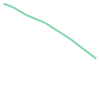

In [23]:
orig_geom

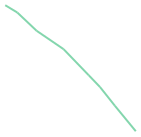

In [24]:
projected_geom

As you can see, the shape of the two road segments are quite different (e.g., the lenth, where the curve occures, etc.). This is exactly due to the difference between the two CRSs.  

It is also worth noting here, the data type, `MultiLineString`, of the variables `orig_geom` and `projected_geom` are defined by `shapely`. It enables us to conduct these kind of spatial operations and visializations. 

In [13]:
type(orig_geom)

shapely.geometry.multilinestring.MultiLineString

### Computation on GeoDataFrame
There are many operations embeded in `GeoDataFrame` that can be directly called to do some spatial computations. For example, we can get the area of buildings for our `bristol_building` dataframe:

In [26]:
bristol_building["building_area"] = bristol_building.area
bristol_building["building_area"].describe()

/var/folders/xg/5n3zc4sn5hlcg8zzz6ysx21m0000gq/T/ipykernel_29404/2251981216.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bristol_building["building_area"] = bristol_building.area


count    1.498050e+05
mean     1.341308e-08
std      6.657677e-08
min      5.667000e-11
25%      6.084315e-09
50%      7.575225e-09
75%      1.033238e-08
max      1.038017e-05
Name: building_area, dtype: float64

Here, you can see a warning that the current Geometry is in a geographic CRS, hence the results of computing area mighht not be accurate. Can you project the dataframe to a projected coordicate reference system (e.g.,EPSG:27700 in our case)? After your projection, do the area computation again. What do the results look like? What is the unit of the area?  

### Spatial join 
As we have discussed in the lecture, joining tables using keys is a core operation for DBMS. Regarding spatial data, spatial join is somewhat similar to table join but with the operation being based on geometries rather than keys.

In this tutorial, we will try to conduct a spatial join and merge information between two `GeoDataFrames`. First, let's read all restaurants (a type of Point of Interests (POI)) at Bristol from the OSM. Then, we combine information from restaurants to the underlying building (restaurants typically are within buildings). We will again use `pyrosm` for reading the data, but this time we will use the `get_pois()` function:

<Axes: >

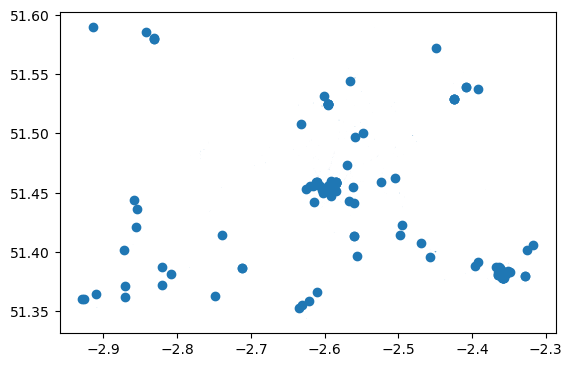

In [28]:
# Read Points of Interest (POI) using the same OSM reader object that was initialized earlier
# The custom_filter={"amenity": ["restaurant"]} indicates that we only want "restaurant", a type of POI
bristol_restaurants = osm.get_pois(custom_filter={"amenity": ["restaurant"]})
bristol_restaurants.plot()

In [29]:
bristol_restaurants.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   lat               142 non-null    float32 
 1   version           698 non-null    int32   
 2   lon               142 non-null    float32 
 3   timestamp         698 non-null    uint32  
 4   id                698 non-null    int64   
 5   changeset         145 non-null    float64 
 6   tags              661 non-null    object  
 7   visible           695 non-null    object  
 8   addr:city         520 non-null    object  
 9   addr:country      52 non-null     object  
 10  addr:housenumber  503 non-null    object  
 11  addr:housename    105 non-null    object  
 12  addr:postcode     632 non-null    object  
 13  addr:place        24 non-null     object  
 14  addr:street       611 non-null    object  
 15  email             31 non-null     object  
 16  name              

From the `info()`, we can see that there are 698 restaurants in Bristol according to OSM (you might see a different number depending on which version of OSM data you have downloaded). Note that OSM is a volunteered geographic information platform. So the quality, accuracy, and completness of the data might be low. 

So far, we've already queried multiple geographic data from OSM, such as buildings, networks, and restaurants. A lot questions can be asked and answered using these data. For instance, one could ask: which building are these restaurants located at in Bristol?  

To answer it, we could simply join data from `bristol_buildings` to  `bristol_restaurants` using `sjoin()` function from `geopandas`:

In [31]:
# Join information from buildings to restaurants
bristol_join = gpd.sjoin(bristol_restaurants, bristol_building)

# Print column names
print(bristol_join.columns)

# Show the dataframe
bristol_join

Index(['lat', 'version', 'lon', 'timestamp', 'id', 'changeset', 'tags',
       'visible', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email',
       'name_left', 'opening_hours', 'operator', 'phone', 'website', 'amenity',
       'bar', 'internet_access', 'source', 'geometry', 'osm_type', 'building',
       'building:levels', 'start_date', 'wikipedia', 'index_right', 'osm_id',
       'code', 'fclass', 'name_right', 'type', 'building_area'],
      dtype='object')


lat  version       lon  timestamp           id  changeset  \
8    51.458733        0 -2.611020          0    853556896        0.0   
10   51.453415        0 -2.625203          0   1207448023        0.0   
12   51.455570        0 -2.619858          0   1386051923        0.0   
17   51.451546        0 -2.585233          0   1881624837        0.0   
21   51.456440        0 -2.589893          0   2900424207        0.0   
..         ...      ...       ...        ...          ...        ...   
695        NaN        0       NaN          0  13036302568        0.0   
696        NaN        0       NaN          0  21028119066        0.0   
696        NaN        0       NaN          0  21028119066        0.0   
696        NaN        0       NaN          0  21028119066        0.0   
696        NaN        0       NaN          0  21028119066        0.0   

                                                  tags visible addr:city  \
8                                                 None   False      None   
10                                                None   False      None   
12                                                None   False   Bristol   
17   {"cuisine":"regional","outdoor_seating":"yes",...   False   Bristol   
21                                 {"cuisine":"pizza"}   False      None   
..                                                 ...     ...       ...   
695  {"addr:suburb":"Clifton","cuisine":"indian","f...     NaN   Bristol   
696  {"brand":"Lounges","brand:wikidata":"Q11431393...     NaN   Bristol   
696  {"brand":"Lounges","brand:wikidata":"Q11431393...     NaN   Bristol   
696  {"brand":"Lounges","brand:wikidata":"Q11431393...     NaN   Bristol   
696  {"brand":"Lounges","brand:wikidata":"Q11431393...     NaN   Bristol   

    addr:country  ... building:levels start_date wikipedia index_right  \
8           None  ...             NaN        NaN       NaN       24609   
10          None  ...             NaN        NaN       NaN        1164   
12          None  ...             NaN        NaN       NaN       23228   
17          None  ...             NaN        NaN       NaN        2138   
21          None  ...             NaN        NaN       NaN        1945   
..           ...  ...             ...        ...       ...         ...   
695          NaN  ...            None        NaN       NaN      138593   
696          NaN  ...            None        NaN       NaN       12059   
696          NaN  ...            None        NaN       NaN       12056   
696          NaN  ...            None        NaN       NaN       12060   
696          NaN  ...            None        NaN       NaN       12050   

        osm_id  code    fclass                             name_right   type  \
8    451622999  1500  building                            The Clifton   None   
10   104679655  1500  building                       Avon Gorge Hotel  hotel   
12   444980827  1500  building                           Rodney Hotel   None   
17   125956114  1500  building  Hilton Garden Inn Bristol City Centre   None   
21   124113904  1500  building                          The Galleries   None   
..         ...   ...       ...                                    ...    ...   
695   13450709  1500  building                          The Mint Room   None   
696  294408176  1500  building                                Betfred   None   
696  294408173  1500  building                               Cardzone   None   
696  294408177  1500  building                        Lloyds Pharmacy   None   
696  294408167  1500  building                               Coffee#1   None   

    building_area  
8    9.942395e-09  
10   8.777610e-08  
12   2.753519e-08  
17   1.725836e-07  
21   6.674781e-07  
..            ...  
695  1.037321e-08  
696  1.605422e-08  
696  1.653643e-08  
696  4.476135e-08  
696  4.719127e-08  

[899 rows x 38 columns]

Now with this joined table, you can check which building each restaurant is locatd in. Note that after joining information from the buildings to restaurants, geometries of the left-side `GeoDataFrame`, i.e. restaurants, were kept as the default geometries. So if we plot `bristol_join`, you will only see restaurants, rather than buildings + restaurant. Please try!  

Also by default, `sjoin()` use the topological relation - intersects. You can also specify this parameter as other types of topological relatoons (e.g., contains and within) in the function. More details can be found at: https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html

### Visualization 
So far, we simply used the `plot()` function to visualize `GeoDataFrame`. These maps are less appealing compared to the ones generated via GIS softwares. In fact, the package: `matplotlib` is very powerful in providing us beautiful visualization in Python too. Let's try it.

First, let's add some legends to the `bristol_building` data using its building type:

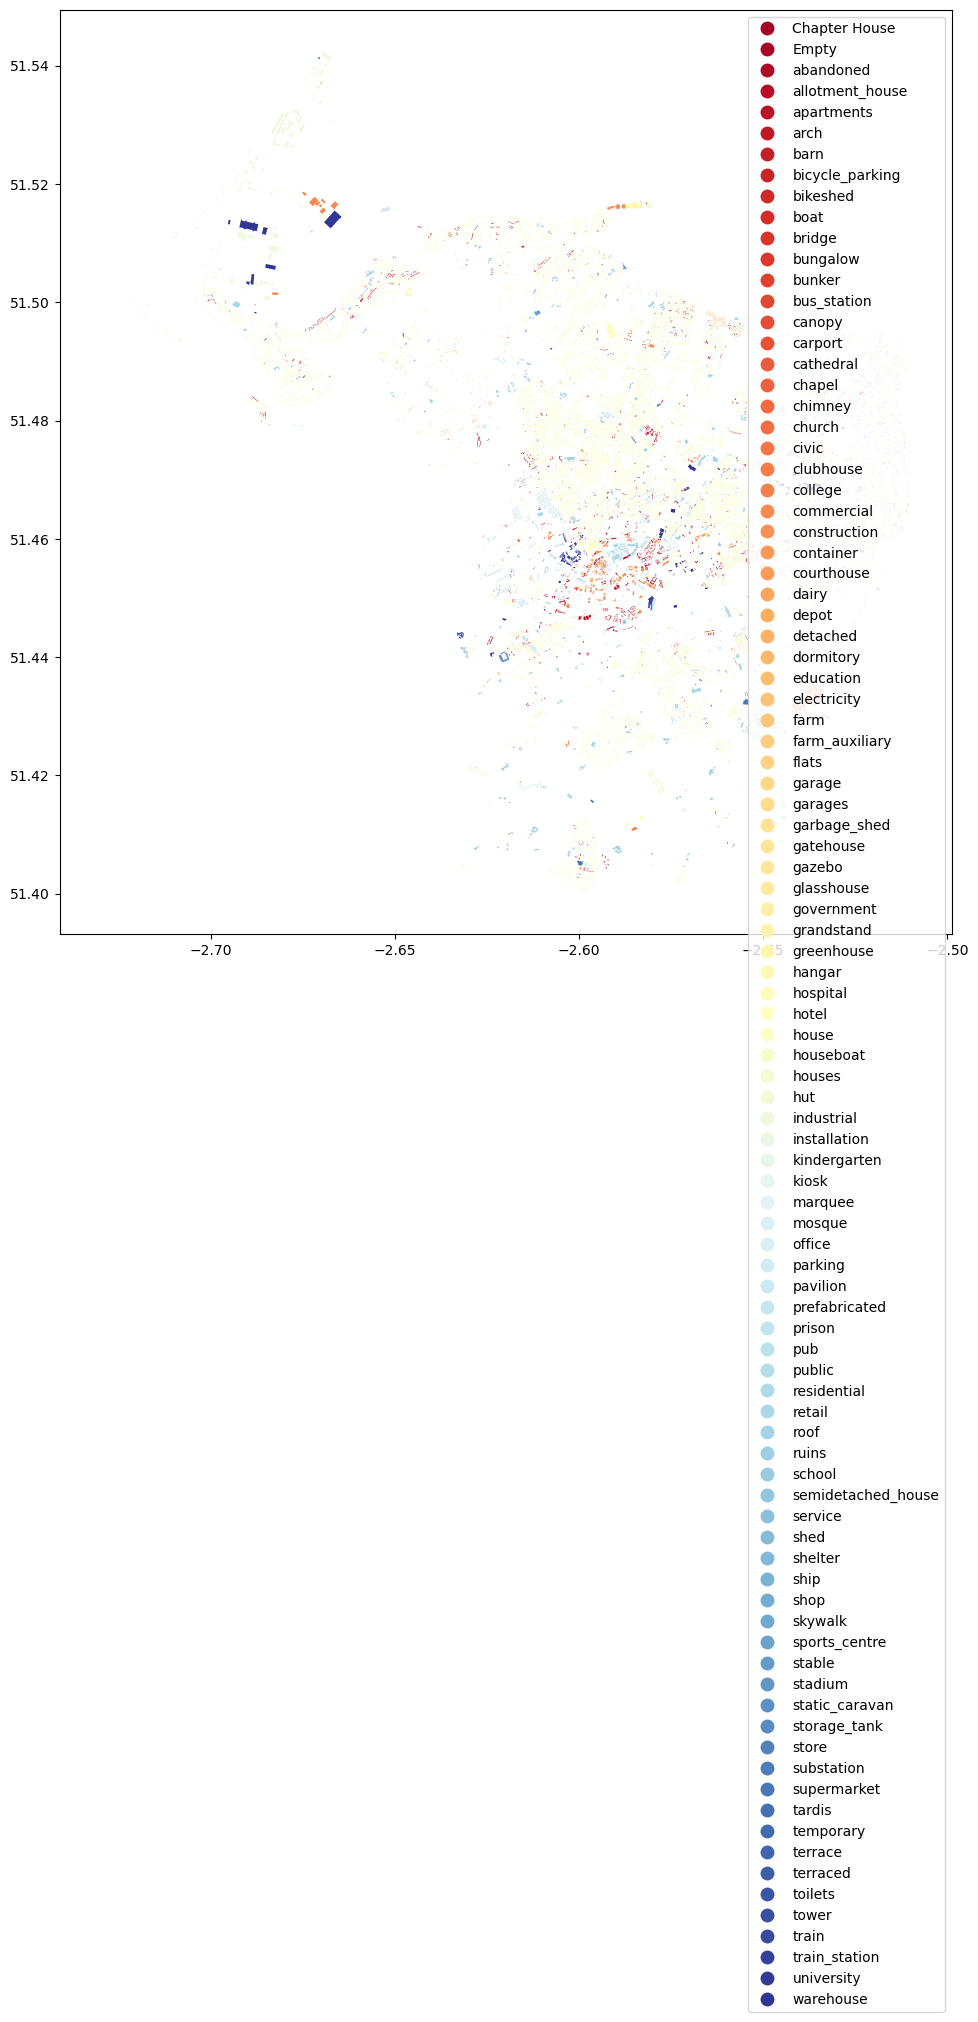

In [32]:
ax = bristol_building.plot(column="type", cmap="RdYlBu", figsize=(12,12), legend=True)

Here, we used the parameter `column` to specify the attribute that is used to specify the color for each building (it can be categorical/discrete or continuous). We then used `cmap` to specify the colormap for the categories and we added the legend by specifying `legend=True`. Note that since the type of buildings for Bristol is very diverse, we see a long list of place types in the legend. There are ways to make it into columns. Can you explore how to achieve it? Feel free to use Google search/ChatGPT for help! 

Another issue is that the map is in a very large map scale. Next, we would like to zoom in a little bit. To do so, we can use `set_xlim()` and `set_ylim()` functions:

(51.44, 51.48)

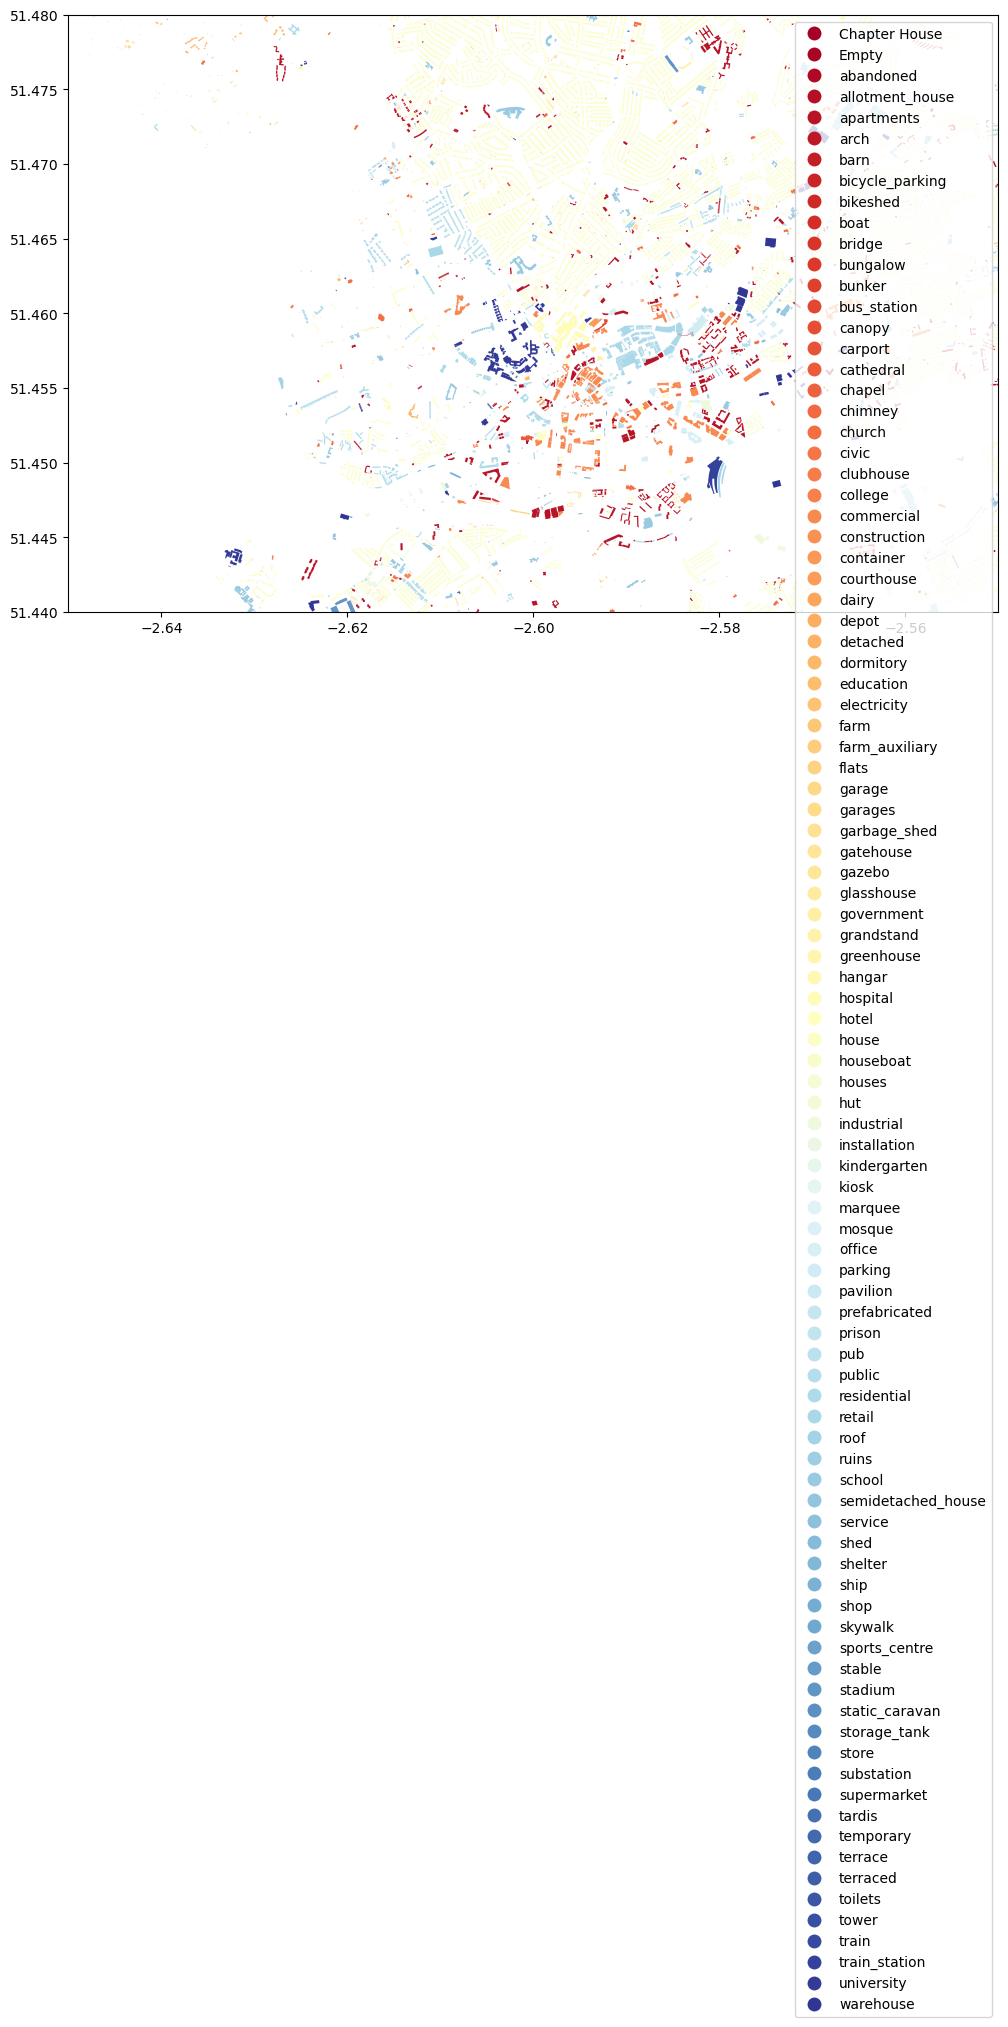

In [33]:
# Zoom into city center by specifying X and Y coordinate extent
# These values should be given in the units that our data is presented (here decimal degrees)
xmin, xmax = -2.65, -2.55
ymin, ymax = 51.44, 51.48

# Plot the map again
ax = bristol_building.plot(column="type", cmap="RdYlBu", figsize=(12,12), legend=True)
 

# Control and set the x and y limits for the axis
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

As you can see, we now zoomed in to the city center quite a lot. You can adjust the parameters yourself and test more! 

Meanwhile, you may wonder whether we can overlay multiple `DataFrames` into the map? The answer is yes. Here is a sample code:

(51.44, 51.48)

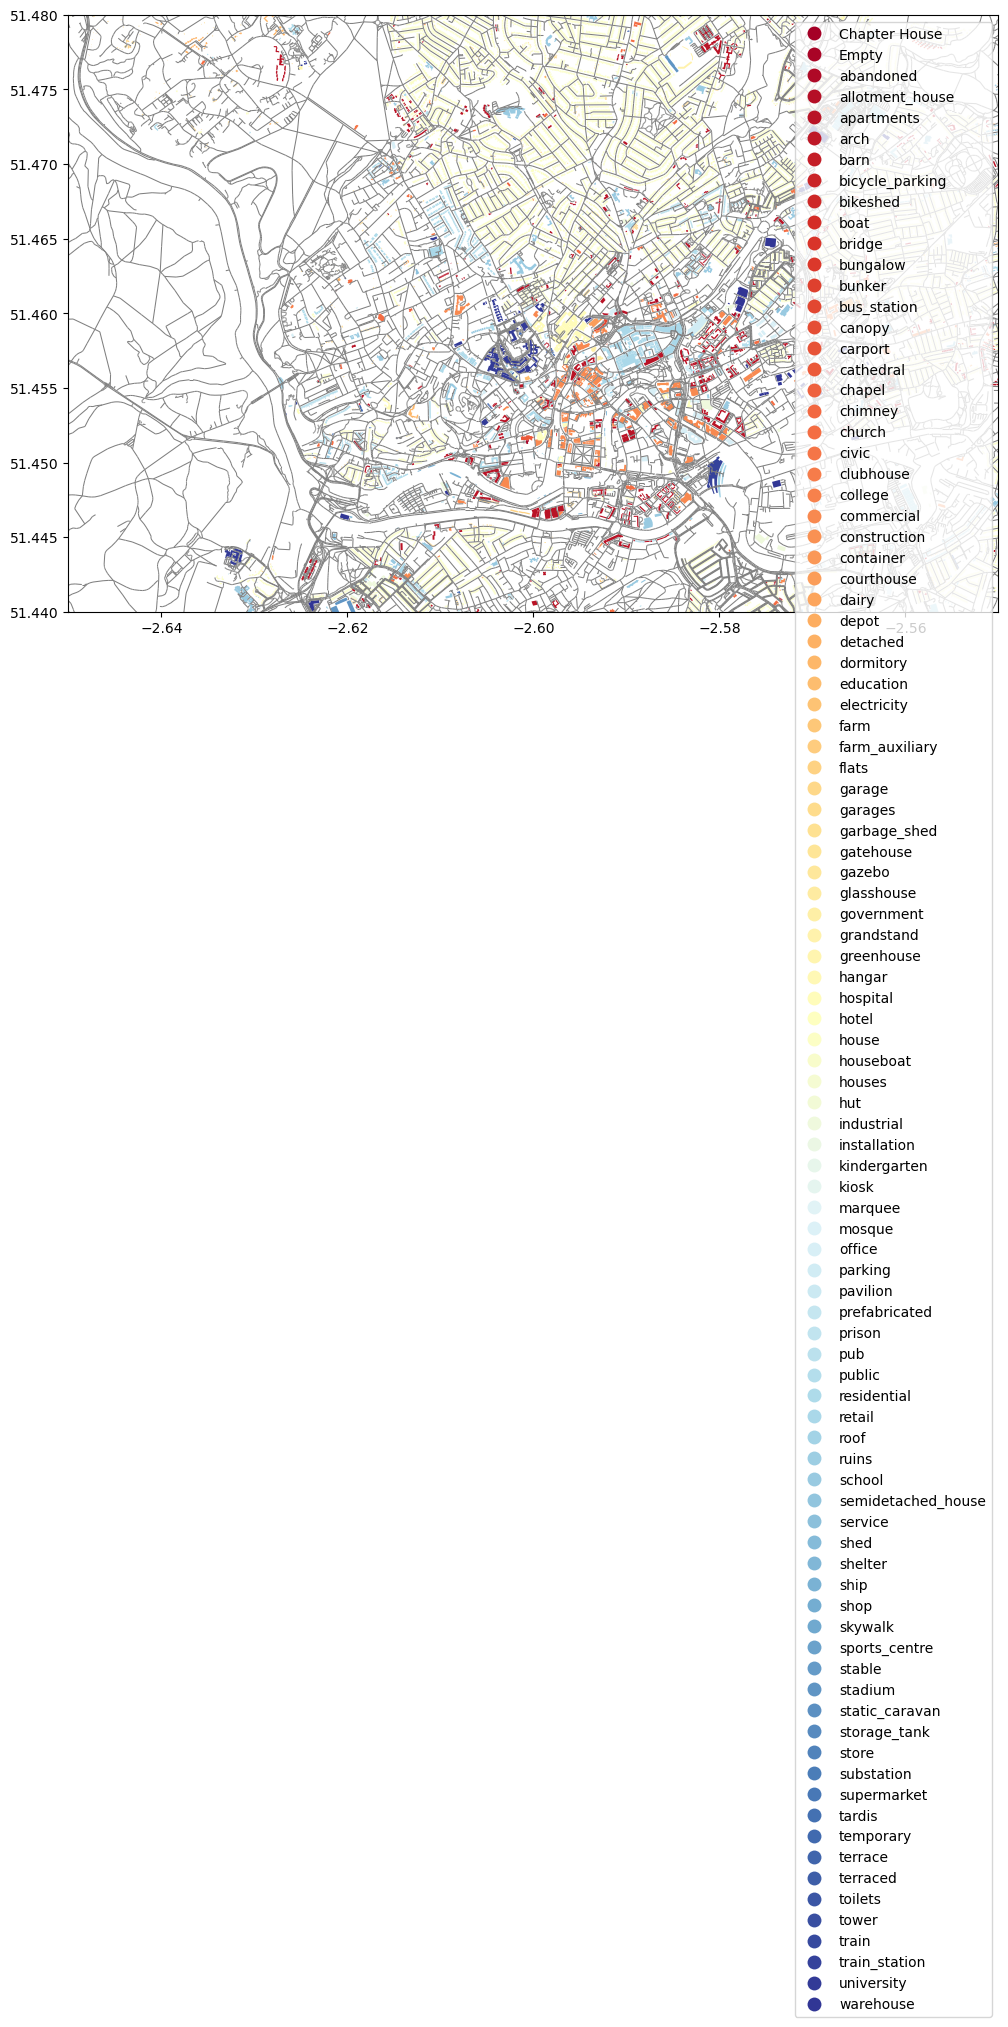

In [34]:
# Zoom into city center by specifying X and Y coordinate extent
# These values should be given in the units that our data is presented (here decimal degrees)
xmin, xmax = -2.65, -2.55
ymin, ymax = 51.44, 51.48

# Plot the map again
ax = bristol_building.plot(column="type", cmap="RdYlBu", figsize=(12,12), legend=True)

# Plot the roads into the same axis
ax = bristol_roadnetwork.plot(ax=ax, edgecolor="gray", linewidth=0.75)

# Control and set the x and y limits for the axis
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

Congrats! You have now finished the very first lab of using Python to retrieve, process, and visualize spatial data. I hope you enjoyed it and have seen the power of `GeoPandas`, and Python in general, for processing and studying spatial data. It is also worth highlighting that the functions introduced in this tutorial are selective. There are way more interesting and useful functions provided by these aforementioned packages. I highly recommended you to explore them by yourself. Learning never stops! 

Finally, let's go back to the task of asking you to figure out how to better organize the long legend box. Below is the solution I found. There might be other ways of doing it. How is yours? 

Basically, I used the parameter `legend_kwds` to set up the number of columns (`ncol`) to be `4`. For more details, check its [official documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html). Note that knowing how to read these kinds of documentations would be very helpful for your programming, so it is an important skill/experience you should develop. 

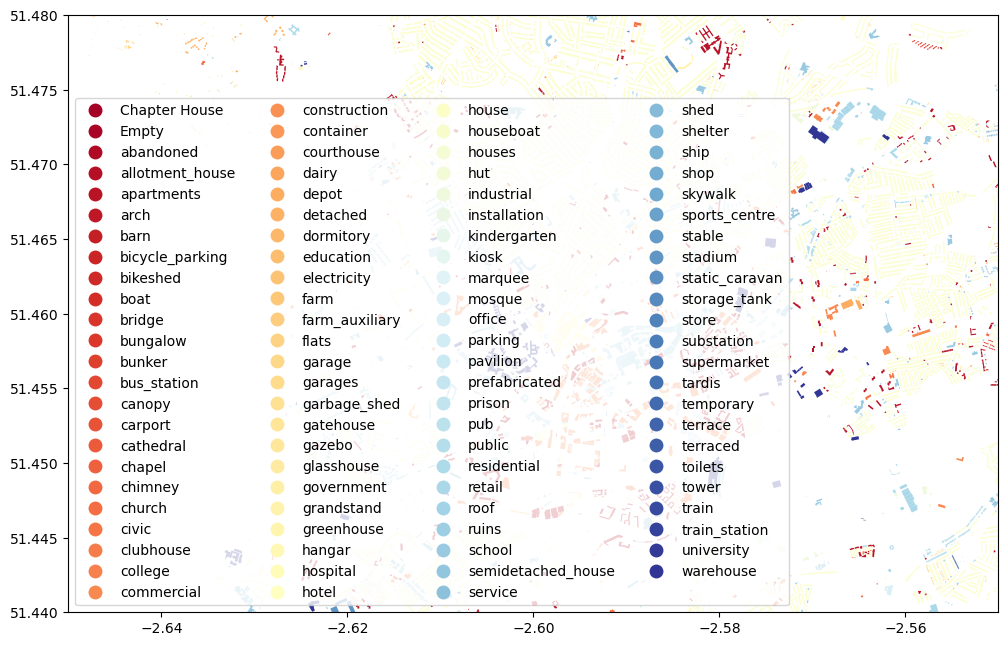

In [35]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

xmin, xmax = -2.65, -2.55
ymin, ymax = 51.44, 51.48

fig, ax = plt.subplots(figsize=(12, 12))


bristol_building.plot(column='type',
                categorical=True,
                cmap="RdYlBu",
                ax=ax, 
                legend=True,
                legend_kwds={'loc': 'lower left',
                             'ncol': 4,
                             'bbox_to_anchor': (0, 0, 0.5,0.5)})
#ax.set_axis_off()
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()